# Generating uniform points on a sphere

In this exercise, we will generate a point that is uniformly distributed on the *surface* of a three dimensional sphere.

*  Let $X$, $Y$, and $Z$ be independent standard normal variables.  Show that for any rotation  $\theta$, we have that $\theta(X,Y,Z)$ has the same distribution as $(X,Y,Z)$.  Hint:  use the [power](https://www.youtube.com/watch?v=3yfYetkMLPM) of linear algebra.

*  It is true that there is only one distribution on the sphere that is rotationally-invariant.  Using this fact, and the previous exercise, show that the random variable 
$$ U = \frac{(X,Y,Z)}{\sqrt{X^2 + Y^2 + Z^2}}$$
is uniformly distributed on the sphere of radius $1$. 

*  Code it and code a Poisson point process on the sphere of intensity $4$.   Hint:  recall that a sphere has surface area $4\pi r^2$.  

*  We will also plot the simulation.

## Solutions

*  The rotation invariance of $(X, Y, Z)$ follows from the fact that every rotation can be represented as a linear transformation $A$, where $A A^t = I$.  Also recall the following fact, which we state as an exercise:


### Mini-review

Suppose $X \sim N(\mu, V)$, where $\mu \in \mathbb{R}^n$ and $V \in \mathbb{R}^{n \times n}$ is a positive definite symmetric  covariance matrix, so that $X$ has a non-degenerate   multivariate normal distribution.  Let $A \in \mathbb{R}^{n \times n}$ be a matrix with $\det(A) \not = 0$.  Think of $X \in \mathbb{R}^{n \times 1}$ as a column vector.    What is the distribution of $Y=AX$?

Note that:
The pdf for $X$ is given by 
$$f(x) =  \frac{1}{\sqrt{(2\pi)^ n |\det (V)|  }} \exp[ -\tfrac{1}{2} (x-\mu)^t V^{-1} (x - \mu)  ],$$
where $x \in \mathbb{R}^{n \times 1}$, and $t$ denotes matrix transposition.  

#### Solution

Clearly, the transformation $x \to Ax$ is a bijection. Set $$W = A V A^t,$$ so that $$W^{-1} =   (A^{-1})^tV^{-1} A^{-1},$$ and
$$\det(W) =  \det(A) \det(V) \det(A).$$

We will show that $Y \sim N(A\mu, W)$.   The change of variables formula gives that the pdf for $Y$ is given by
$$
\begin{eqnarray*}
y &\mapsto& f(A^{-1}y  ) |\det(A) ^{-1}| \\
&=& \frac{1}{\sqrt{(2\pi)^ n |\det (V)|  }} \exp[-\tfrac{1}{2} (A^{-1}y -\mu)^t V^{-1} (A^{-1}y - \mu)  ]|\det(A) ^{-1}|  \\
&=&
\frac{1}{\sqrt{(2\pi)^ n |\det (V)|\det(A)|^2  }} \exp[-\tfrac{1}{2} (y -A\mu)^t (A^{-1})^tV^{-1} A^{-1}(y - A\mu)  ] \\
&=& \frac{1}{\sqrt{(2\pi)^ n |\det (W)|  }} \exp[-\tfrac{1}{2} (y -A\mu)^t W^{-1}(y - A\mu)  ], \\
%
\end{eqnarray*}
$$
as required.  

* With this fact in hand, note that you start with the covariance matrix given by the identity, since $X,Y$, and $Z$ are independent.  Observe that for any rotation will simple *cancel out* in the algebra and leave you with the same joint pdf.

*  It easily follows that since the distribution of $(X,Y,Z)$ is invariant under rotations, so too is $U$, from which it follows that $U$ is uniformly distributed on the sphere.


In [1]:
import numpy as np

def point():
    x=np.random.normal()
    y=np.random.normal()
    z=np.random.normal()
    norm= np.sqrt(x**2 + y**2 + z**2)
    p = (1/norm)*np.array([x,y,z])
    return p

def psphere(L):
    L = L * 4* np.pi
    N = np.random.poisson(L)
    if (N==0):
        return None
    else:
        p=point()
        x=np.array(p[0])
        y=np.array(p[1])
        z=np.array(p[2])
        for i in range(N-1):
            pp = point()
            x=np.append(x,pp[0])
            y=np.append(y,pp[1])
            z=np.append(z,pp[2])
    points  = [x,y,z]                # we store the coordinates in this way for easy plotting
    return points


print(psphere(0.1))
print(psphere(0.3))

real = psphere(4)

more = psphere(100)

[array(-0.73699394), array(0.39981345), array(0.5449671)]
[array([-0.5138439 ,  0.52814805,  0.65344507]), array([-0.50566415,  0.84898978,  0.42152163]), array([-0.69301386, -0.01661308, -0.62875198])]


<IPython.core.display.Javascript object>


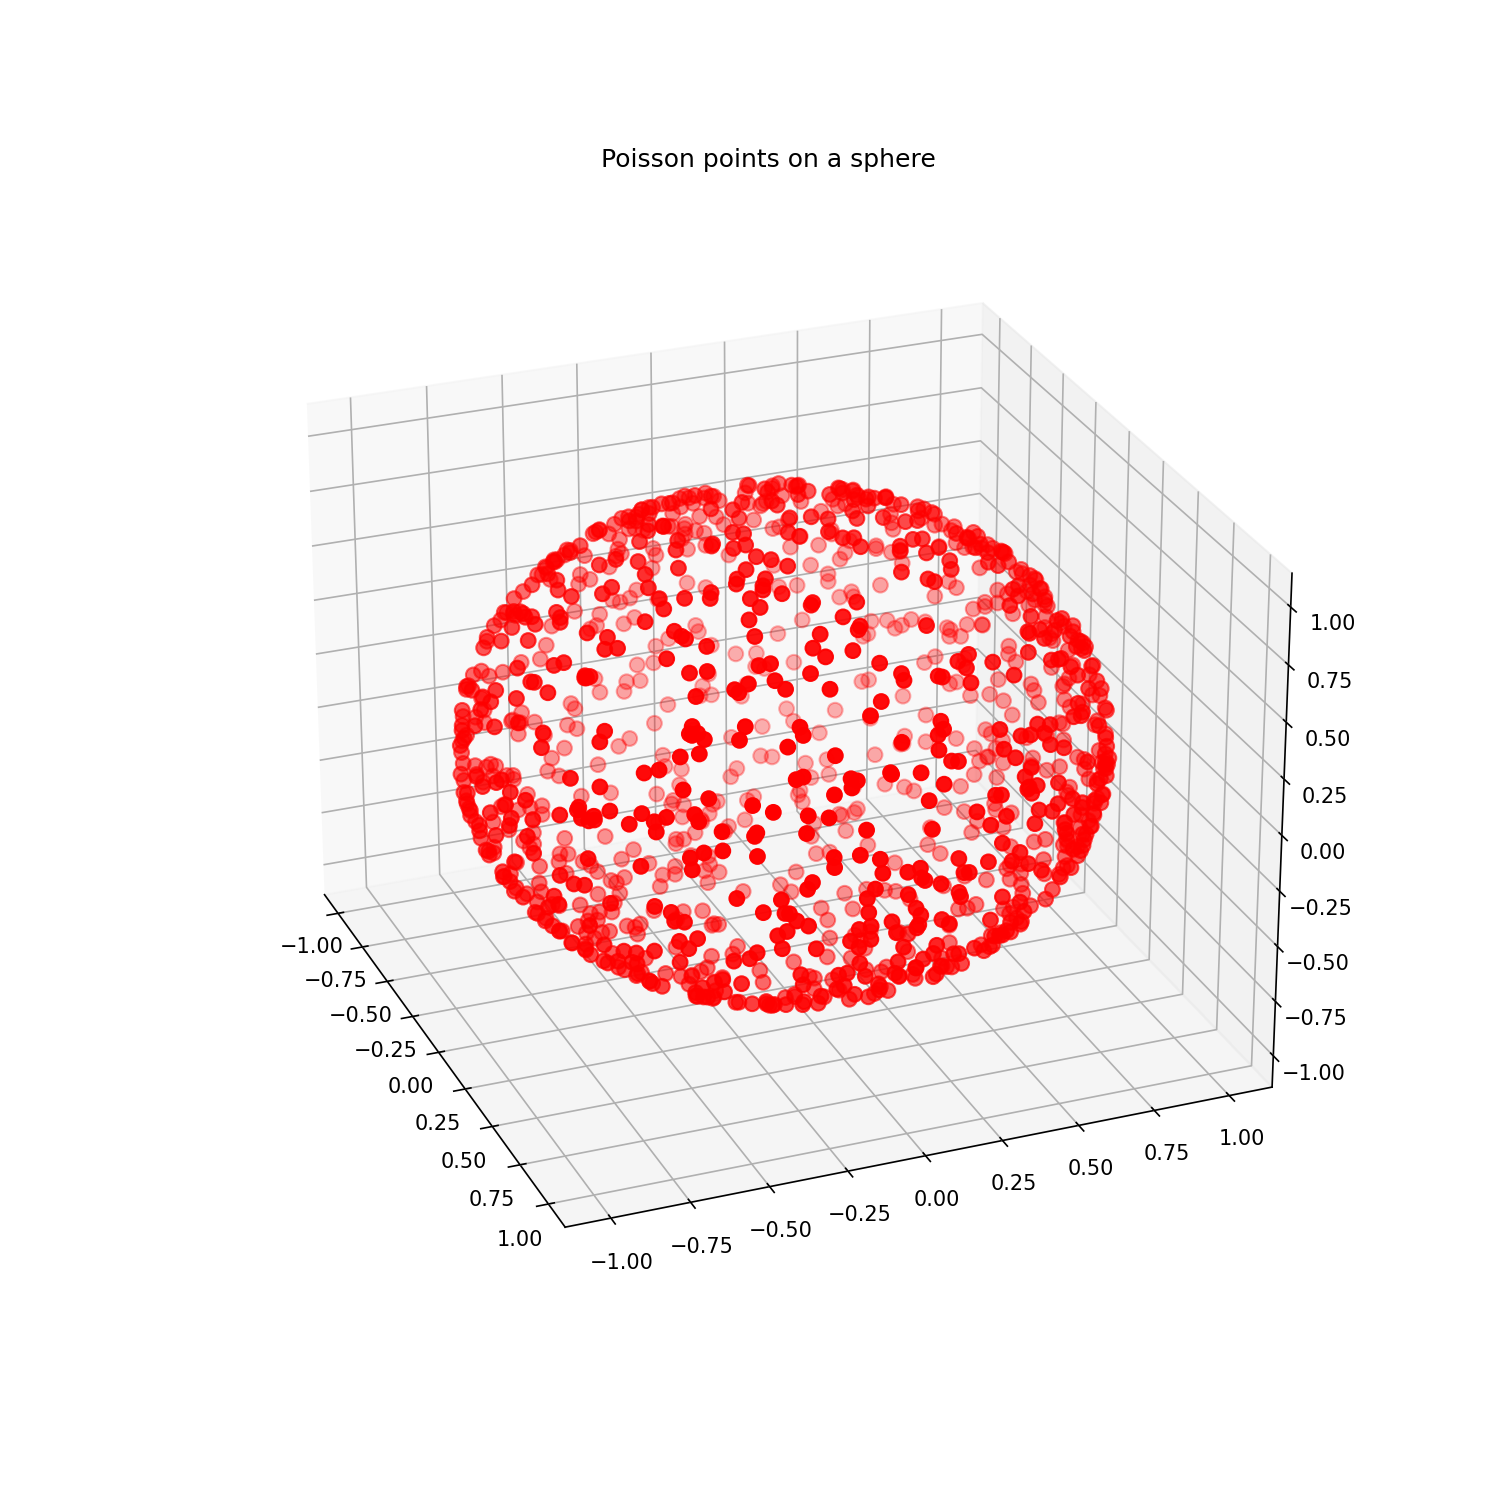

In [2]:
#allows for interacting graph, which we can play with using mouse
%matplotlib notebook                 
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
#plt.style.use('seaborn-poster')

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(more[0], more[1], more[2], c = 'r', s = 50)
ax.set_title('Poisson points on a sphere')

# Set axes label
#ax.set_xlabel('x', labelpad=20)
#ax.set_ylabel('y', labelpad=20)
#ax.set_zlabel('z', labelpad=20)

plt.show()
    

## Endnotes

*  I made a comment that if one were to try to simulate a uniform distribution on a disc, in two-dimensions, it is *not* true that if the point on the disc were expressed in polar coordinates, then the radius is uniformly distributed.  See for example this discussion on [pizza](https://tsoo-math.github.io/ucl/pizza.html)


*  Use the ipynb [source](https://tsoo-math.github.io/ucl2/sphere.ipynb) for the most update version.

In [3]:
from datetime import datetime
print(datetime.now())

2021-11-01 21:31:15.577555
